Line & Scatter Plots
====================
This notebook introduces the methods of creating bar charts from our data, including some of the key concepts of our plotting package, `matplotlib`. Bar charts are useful for making comparisons between close data because we are very good at evaluating the size of rectangles.

Topics covered:

- bar charts
- styling charts (titles, labels, size, color, etc)
- grouped bar charts
- tacked bar charts
- new `school_data` package for custom code

To work on these examples we will use the demographics and ELA/Math test score data.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy.stats import pearsonr
from IPython.display import Markdown as md

from nycschools import schools, ui, exams


In [2]:
df = schools.load_school_demographics()
tests = exams.load_math_ela_long()

Scatter plots and correlations
------------------------------------------
In the next section we're going to see what demographic factors of schools impact
student test scores on the NYS ELA exams, grades 3-8.



In [3]:
factors = ['total_enrollment', 'asian_pct', 'black_pct', 'hispanic_pct', 'white_pct', 'swd_pct', 'ell_pct', 'poverty_pct', 'eni_pct']

# create a table of the correlation matrix with a cool->warm color map
corr = df[factors].corr()
corr.style.background_gradient(cmap='coolwarm')

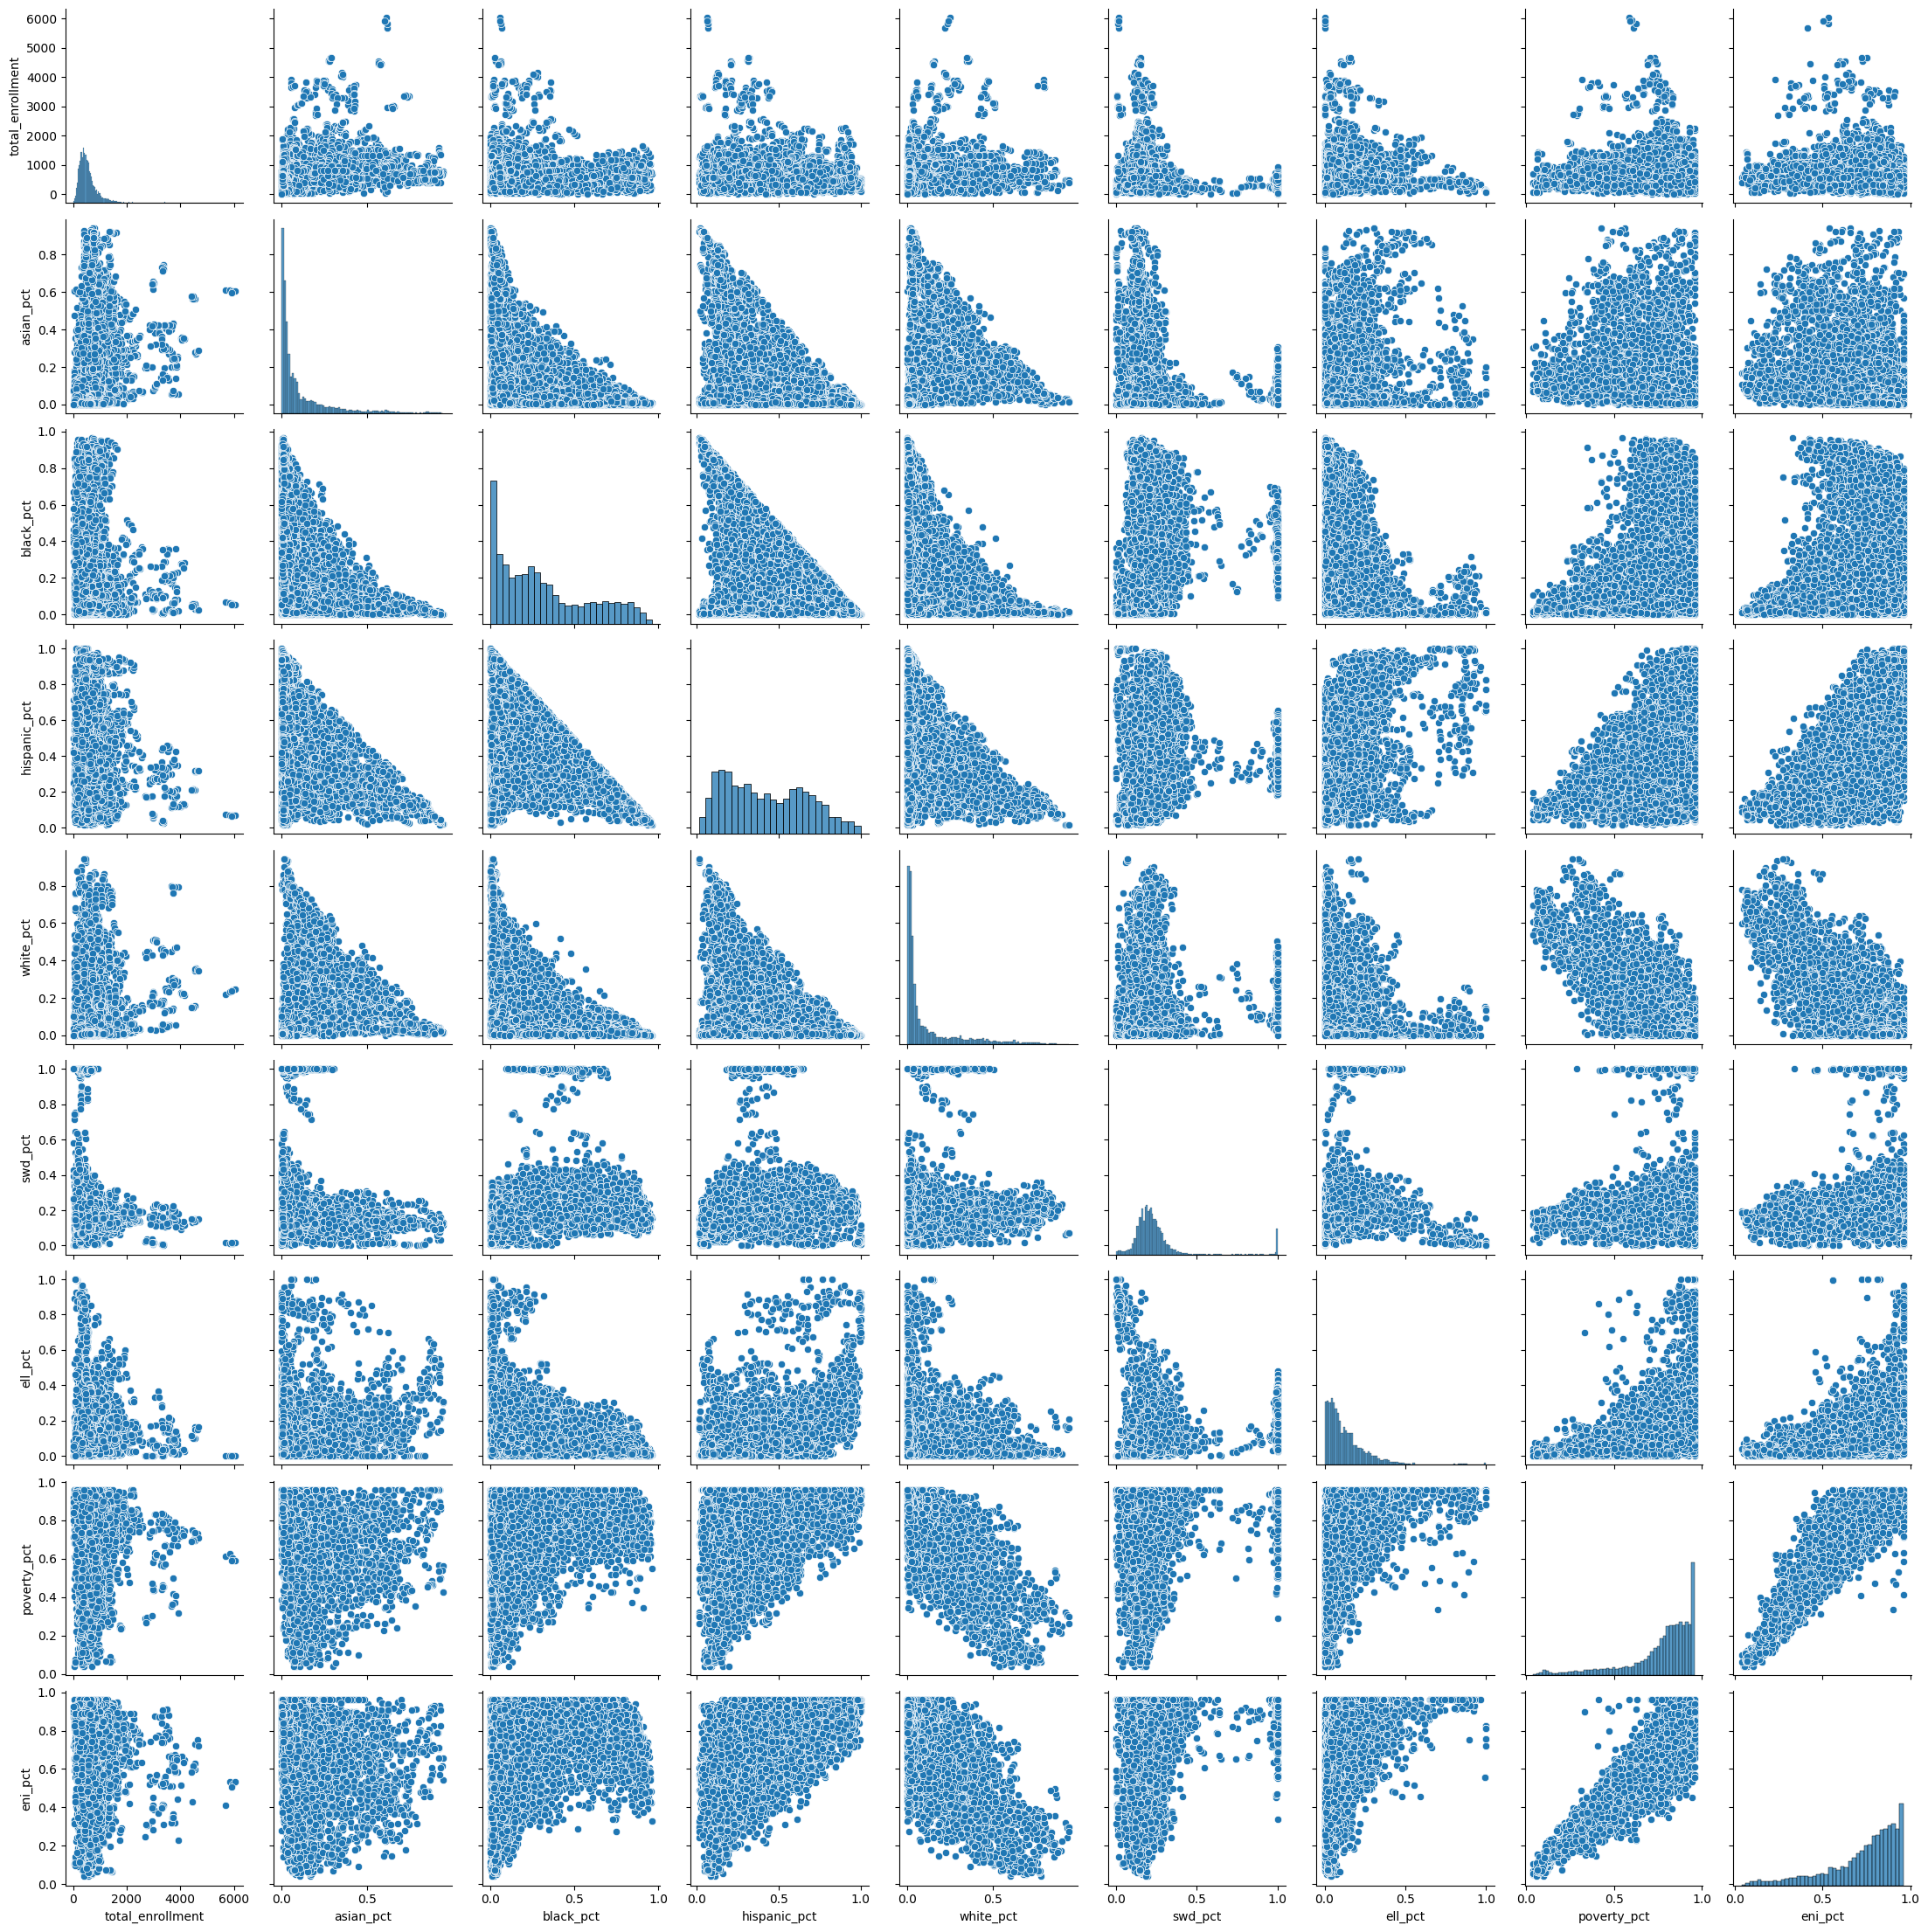

In [4]:
# scatter plot of all of the factors
sns.pairplot(df[factors], kind="scatter")
pass

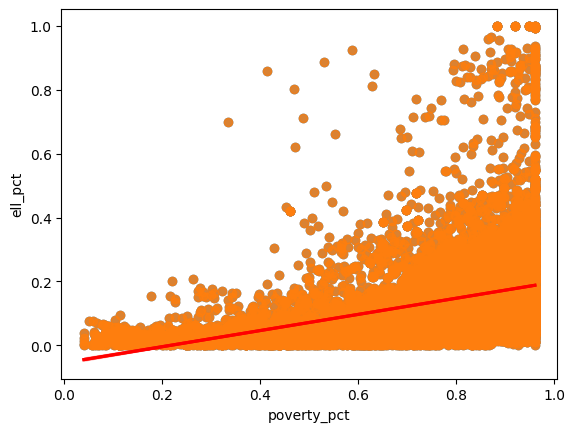

In [6]:
sns.regplot(x=df["poverty_pct"], y=df["ell_pct"], line_kws={"color": "red"} )
plt.show()


**A Pearson's correlation coefficient** was computed to assess the linear relationship 
between _% poverty_ and _% English Language Learners_ (ELL).

There was a positive correlation between the two variables, r(9999) = 0.35, p = 0.000.


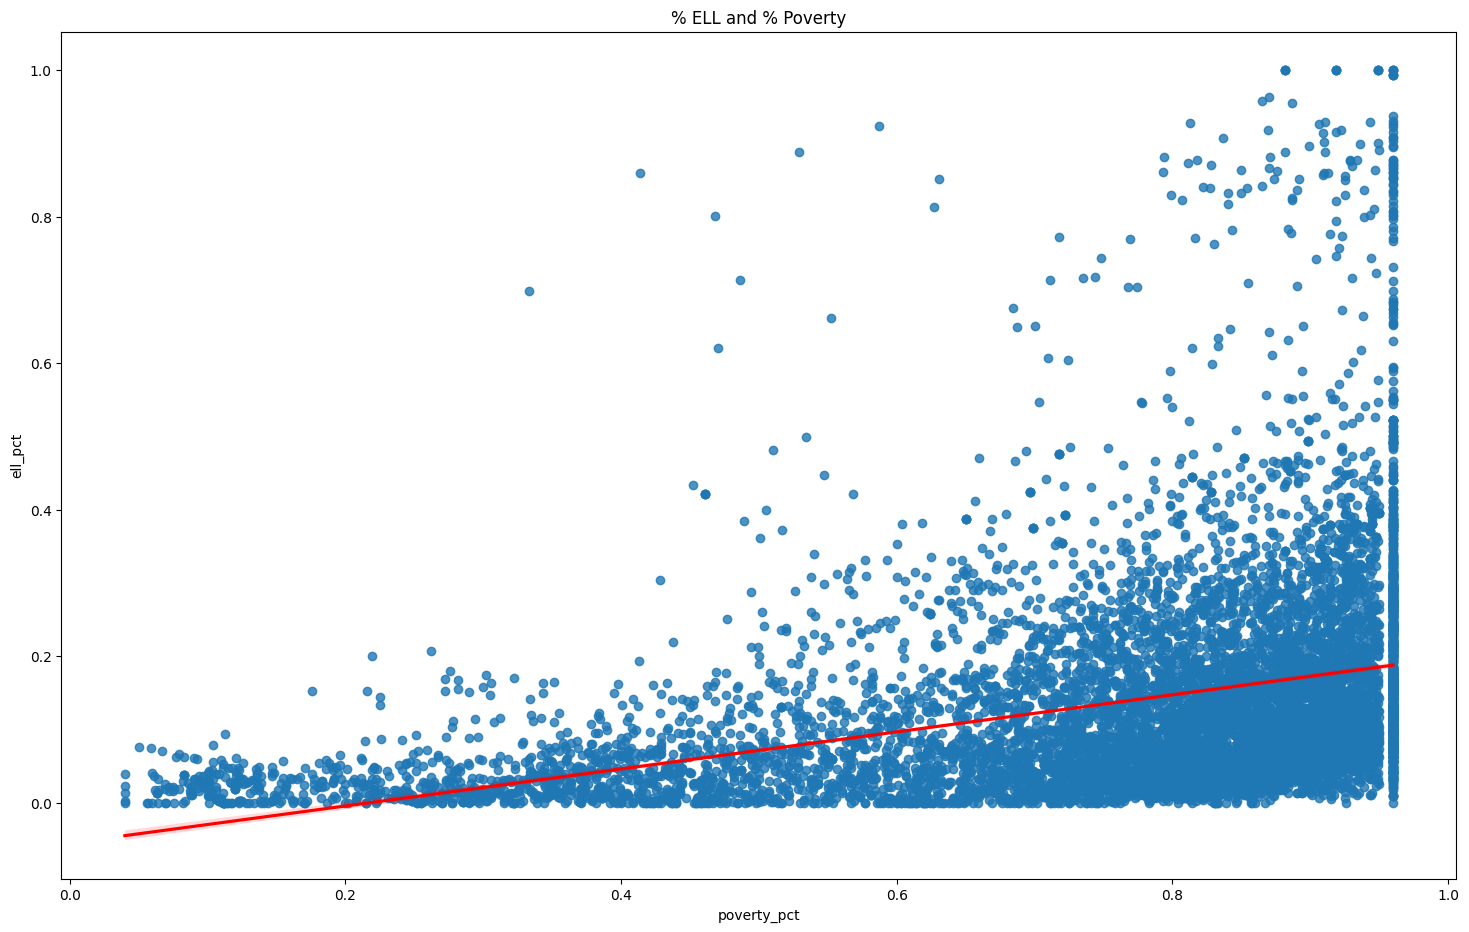

In [8]:

g = sns.regplot(x=df["poverty_pct"], y=df["ell_pct"], line_kws={"color": "red"} )
g.figure.set_size_inches(18, 11)
g.set(title="% ELL and % Poverty")


# show the correlation plot in jupyter
r, p = pearsonr(df['poverty_pct'], df['ell_pct'])

degs_f = len(df) - 2

report_r = f"""
**A Pearson's correlation coefficient** was computed to assess the linear relationship 
between _% poverty_ and _% English Language Learners_ (ELL).

There was a positive correlation between the two variables, r({degs_f}) = {r:.2f}, p = {p:.3f}.
"""

display(md(report_r))
plt.show()

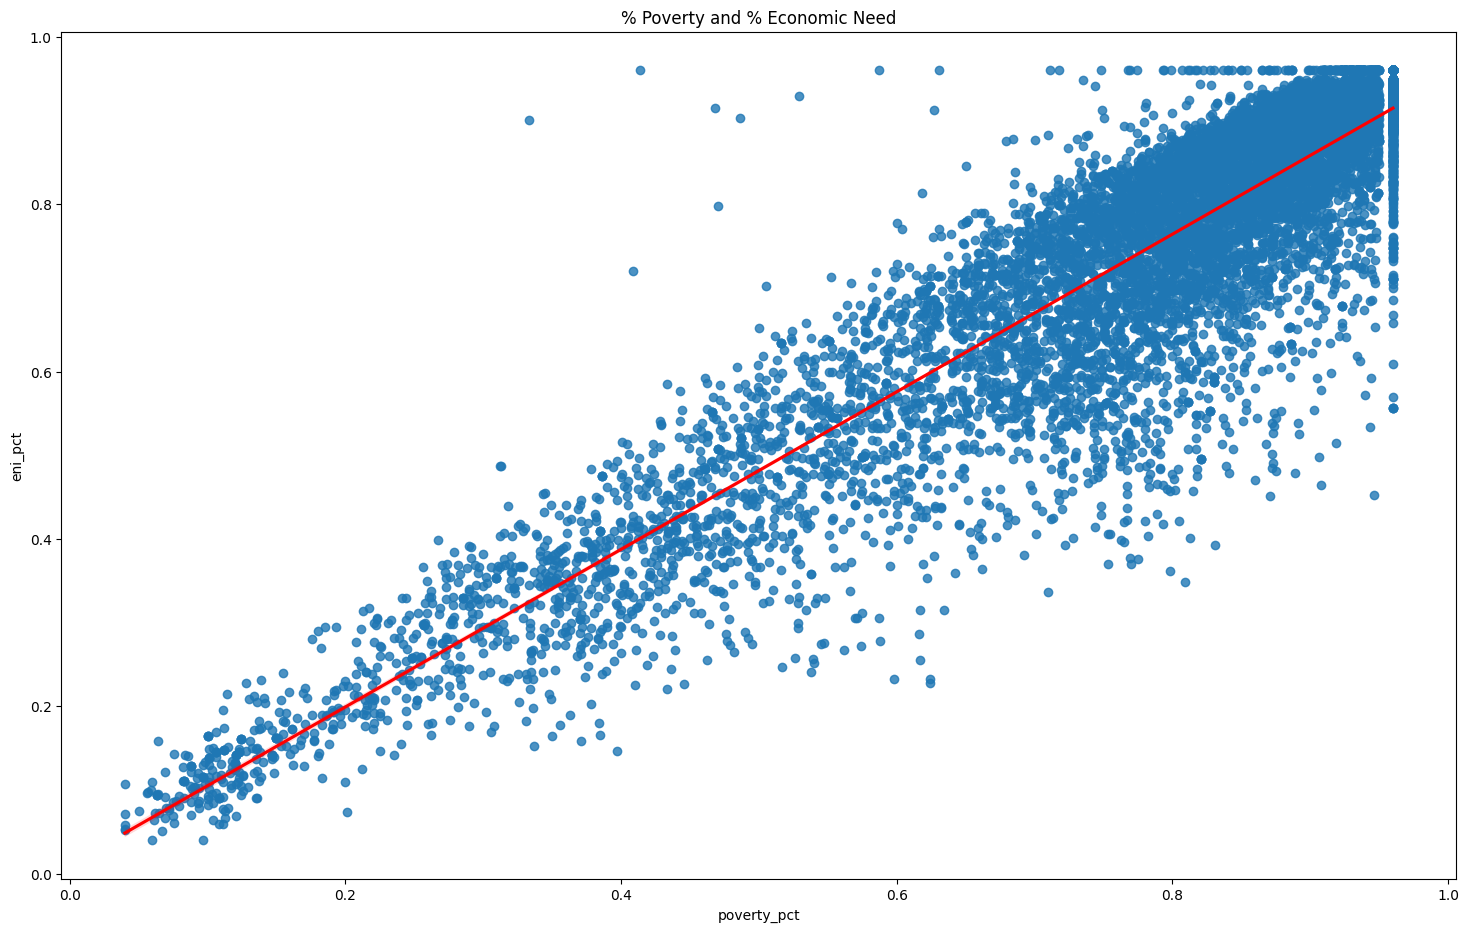

In [9]:
# plot highly correlated % poverty and economic need index -- both measures look at poverty in schools
g = sns.regplot(x=df["poverty_pct"], y=df["eni_pct"], line_kws={"color": "red"} )
g.figure.set_size_inches(18, 11)

g.set(title="% Poverty and % Economic Need")

plt.show()


### Drop outliers

For the next correlation, first we'll drop the outliers by computing z-scores. Outliers can distort the results of our correlations.


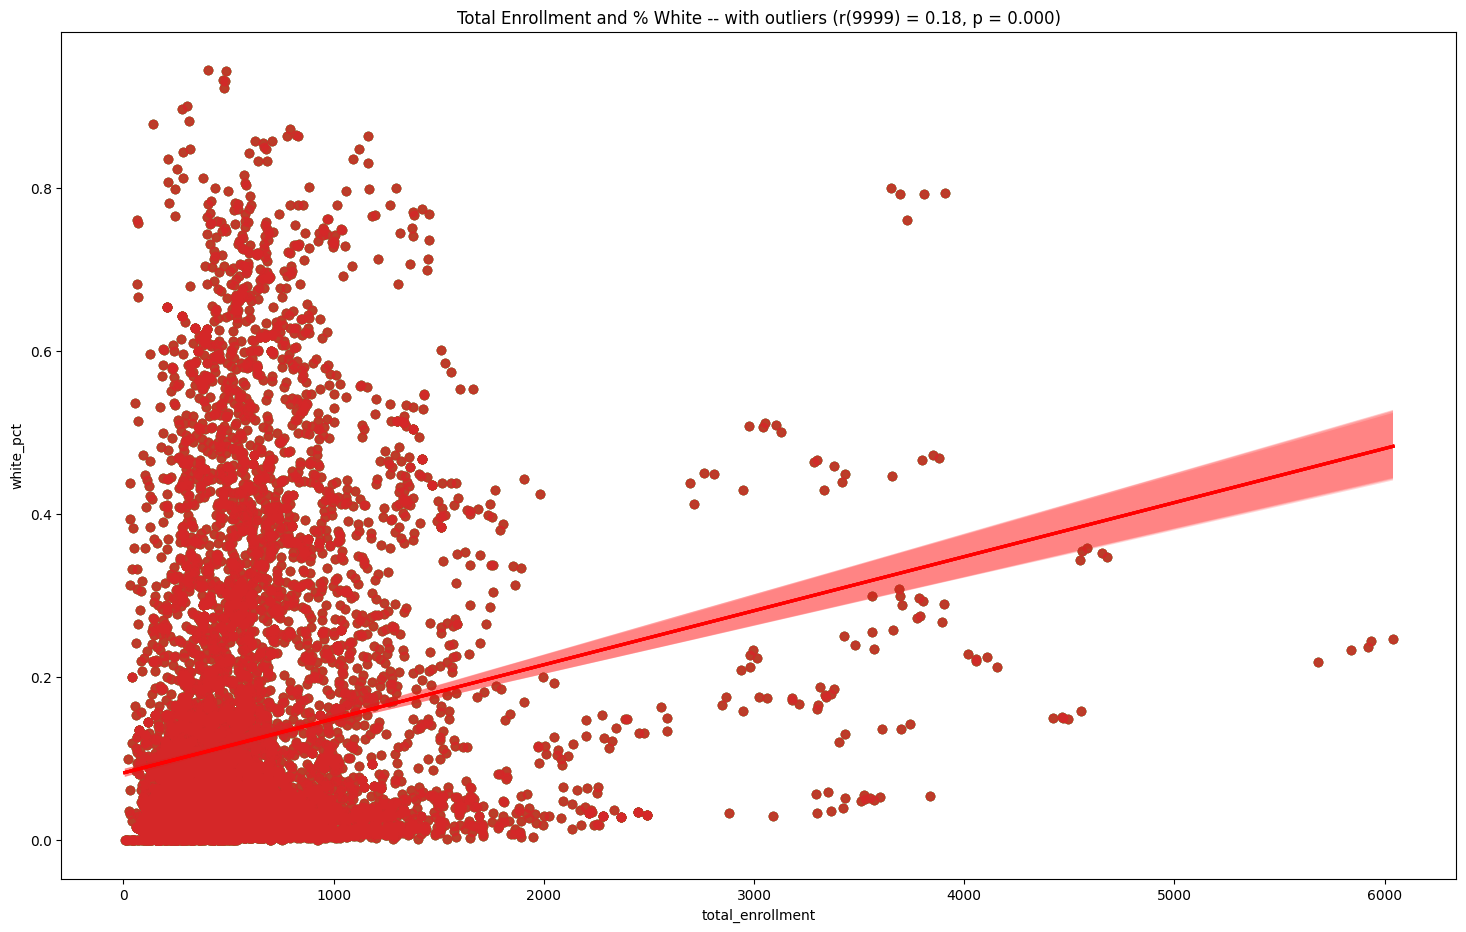

In [15]:
outliers = df[["white_pct", "total_enrollment"]]
x = outliers["total_enrollment"]
y = outliers["white_pct"]
g = sns.regplot(x=x, y=y, line_kws={"color": "red"})
g.figure.set_size_inches(18, 11)
r, p = pearsonr(x, y)
# use the ui helper funciont fmt_pearson to report the r and p values from our correlation
g.set(title=f"Total Enrollment and % White -- with outliers (r({len(x)-2}) = {r:.2f}, p = {p:.3f})")
plt.show()
pass